## Regression Model

We will be using [Superconductivty Data from UCI](https://archive.ics.uci.edu/dataset/464/superconductivty+data).

The steps in this notebook are as follows:
1. Loading, Cleaning, and Exploring
   - Loading the data
   - Fixing the formats
   - Visualizing the features
2. Building the model
    - Linear regression
    - Neural Network

In [25]:
## first the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

## ML packages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

## Neural Net packages
import tensorflow.keras as keras

### 1.1. Loading the Data 

In [2]:
## we will be using the direct link to the data for loading
data = pd.read_csv('https://archive.ics.uci.edu/static/public/464/data.csv')
data.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

### 1.2. Fixing the Formats

In [4]:
## we can first try to decrease the memory usage by changing the datatypes
def data_cleaner(df):
    ## lowecasing the column names
    df.columns = [x.strip().replace(r'\s+','_').lower() for x in df.columns]
    type_dict = {}
    for col in df.columns:
        if df[col].dtype == 'float64' and df[col].min() == df.astype({col:'float16'})[col].min():
            type_dict[col] = 'float16'
        elif df[col].dtype == 'float64' and df[col].min() == df.astype({col:'float32'})[col].min():
            type_dict[col] = 'float32'
        elif df[col].dtype == 'float32' and df[col].min() == df.astype({col:'float16'})[col].min():
            type_dict[col] = 'float16'
        elif df[col].dtype == 'int64' and df[col].min() == df.astype({col:'int8'})[col].min():
            type_dict[col] = 'int8'
        elif df[col].dtype == 'int64' and df[col].min() == df.astype({col:'int16'})[col].min():
            type_dict[col] = 'int16'
        elif df[col].dtype == 'int64' and df[col].min() == df.astype({col:'int32'})[col].min():
            type_dict[col] = 'int32'
    return df.astype(type_dict)
cleaned_data = data_cleaner(data.copy())
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int8   
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float16
 6   wtd_entropy_atomic_mass          21263 non-null  float16
 7   range_atomic_mass                21263 non-null  float16
 8   wtd_range_atomic_mass            21263 non-null  float16
 9   std_atomic_mass                  21263 non-null  float16
 10  wtd_std_atomic_mass              21263 non-null  float16
 11  mean_fie                         21263 non-null  float16
 12  wtd_mean_fie      

we successfully decreased the memory usage by 60%!

### 1.3. Visualizing the Features

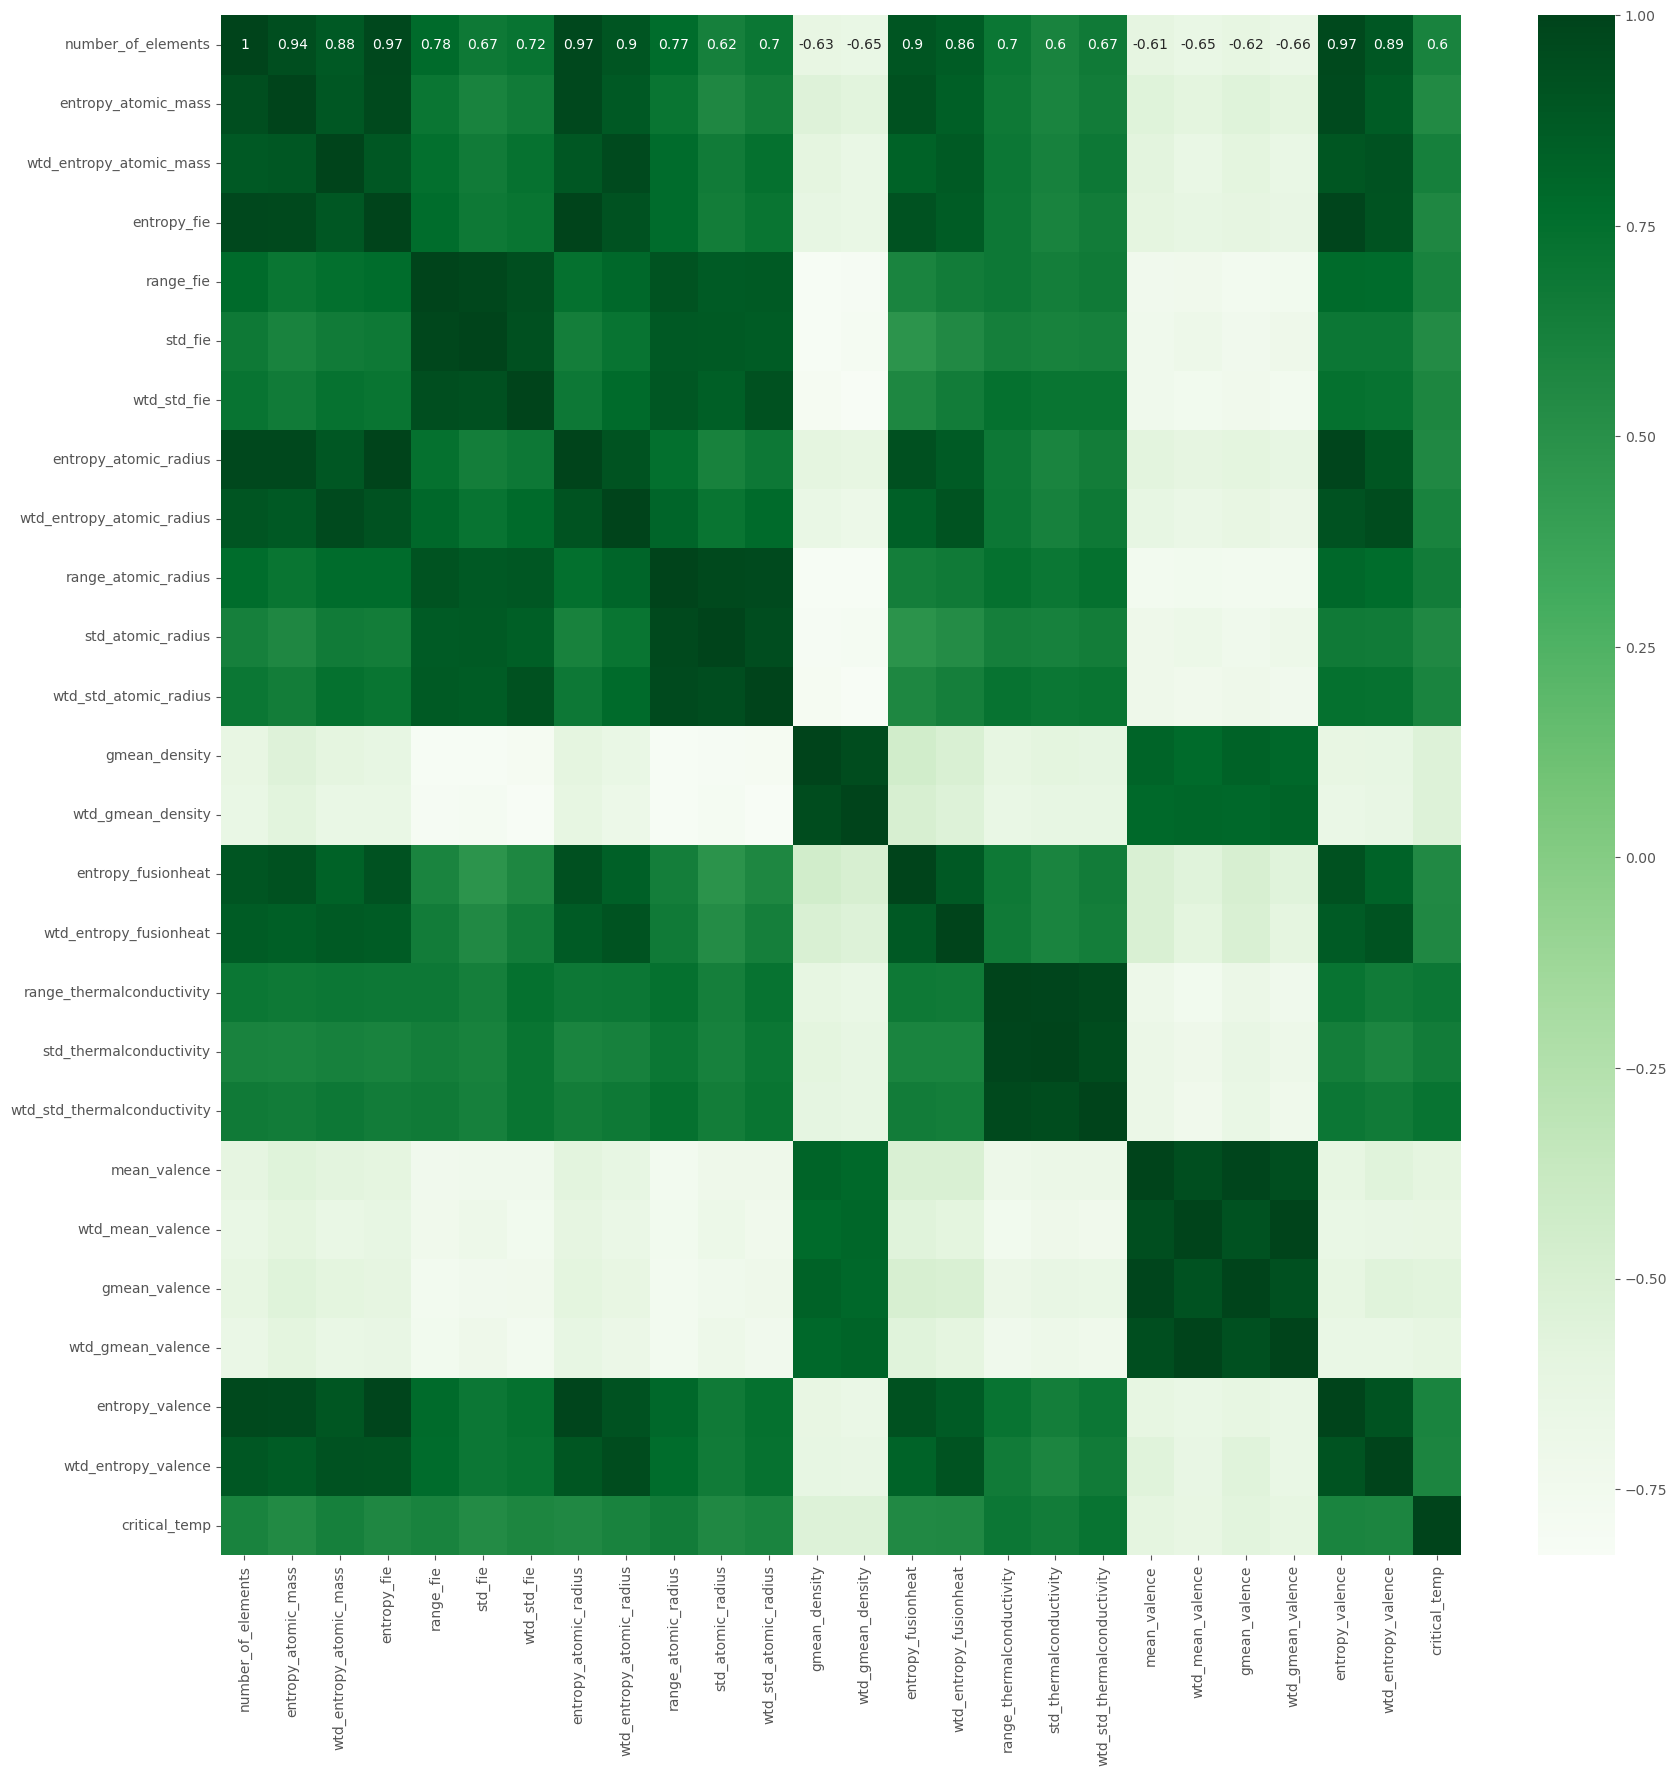

In [8]:
## we will be using the heatmap to show the corr for each feature
corr_vals = cleaned_data.corr()
corr_vals = corr_vals[abs(corr_vals['critical_temp'])>0.5]
## and we're only interested in the columns that have strong relationships with temp
plt.figure(figsize = (20, 20))
sns.heatmap(corr_vals[corr_vals.index], cmap = 'Greens', annot=True);

we can also look at the actual scatter plots for each of these selected columns

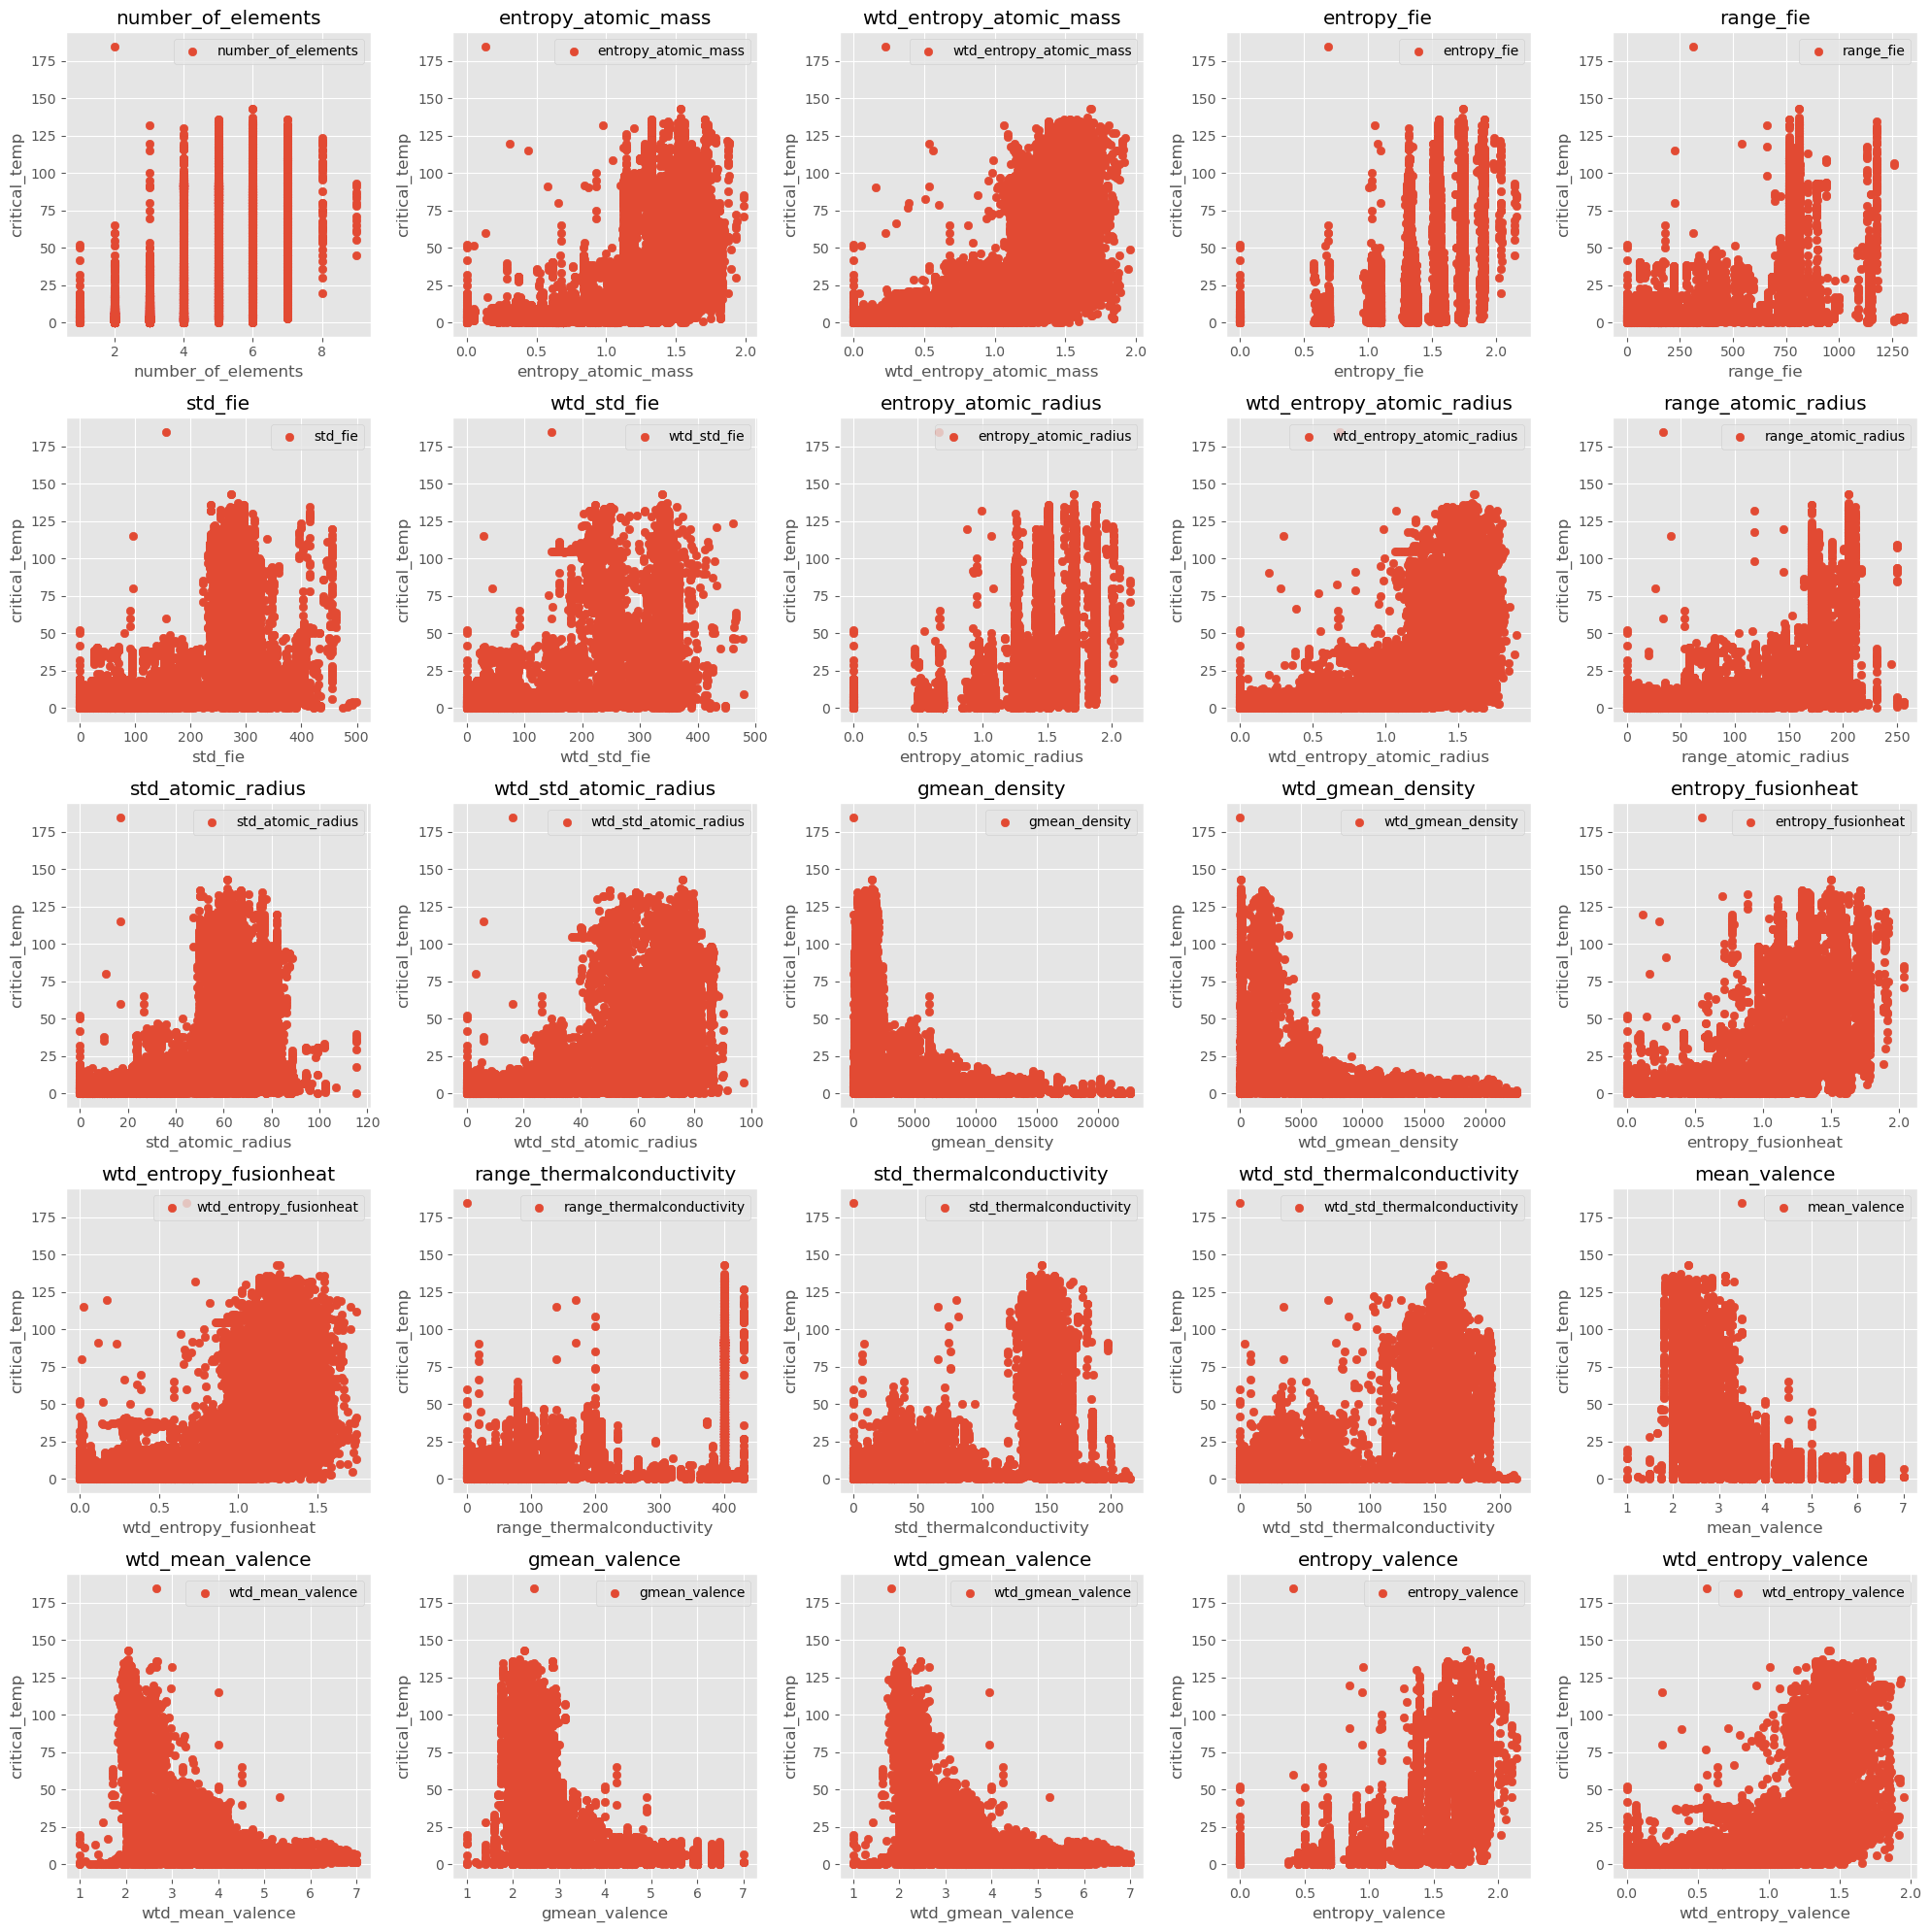

In [9]:
plt.figure(figsize = (20,20))
nrows, ncols = 5, 5
c = 1
for col in corr_vals.index:
    if col != 'critical_temp':
        plt.subplot(nrows, ncols, c)
        plt.scatter(cleaned_data[col], cleaned_data['critical_temp'], label=col)
        c+=1
        plt.ylabel('critical_temp')
        plt.xlabel(col)
        plt.title(f'{col}')
        plt.legend()
plt.tight_layout();

We can see that a few of the features are showing linearity with respect to the *critical_temp*.

In [11]:
selected_feat = ['entropy_valence', 'wtd_entropy_valence', 'wtd_entropy_fusionheat', 'wtd_entropy_fusionheat',
                'wtd_std_thermalconductivity', 'std_atomic_radius', 'entropy_atomic_radius', 'entropy_fusionheat',
                'entropy_atomic_mass', 'wtd_entropy_atomic_mass']

### 2.1. Linear Regression Model

In [31]:
## spliting and scaling the data
X, y = cleaned_data[selected_feat], cleaned_data['critical_temp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
## next we have to scale our data
sc = StandardScaler()
sc.fit(X_train)
X_train, X_test = sc.transform(X_train), sc.transform(X_test)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((17010, 10), (17010,), (4253, 10), (4253,))

In [32]:
lr_pipe = Pipeline([('lr', LinearRegression())])
lr_pipe.get_params()

{'memory': None,
 'steps': [('lr', LinearRegression())],
 'verbose': False,
 'lr': LinearRegression(),
 'lr__copy_X': True,
 'lr__fit_intercept': True,
 'lr__n_jobs': None,
 'lr__positive': False}

In [33]:
params = {'lr__fit_intercept':[True, False],
         'lr__n_jobs':[None, 1, 2],
         'lr__positive':[True, False]}
lr_gs = GridSearchCV(lr_pipe,
                    param_grid=params,
                    cv = 3)
lr_gs.fit(X_train, y_train)
best_model = lr_gs.best_estimator_
print(best_model)
ypreds = best_model.predict(X_test)
print(best_model.score(X_test, y_test))
print(f'MAE: {mean_absolute_percentage_error(y_test, ypreds)}')
print(f'MSE: {mean_squared_error(y_test, ypreds)}')

Pipeline(steps=[('lr', LinearRegression())])
0.5757447228330062
MAE: 6.712874121469316
MSE: 510.59692271511676


Our model with the selected features didn't preform that well, so maybe we can try testing the model by adding more features.

In [34]:
## spliting and scaling the data
X_full, y_full = cleaned_data[corr_vals.index], cleaned_data['critical_temp']
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=.2)
## next we have to scale our data
sc = StandardScaler()
sc.fit(X_train_full)
X_train_full, X_test_full = sc.transform(X_train_full), sc.transform(X_test_full)
X_train_full.shape, y_train_full.shape, X_test_full.shape, y_test_full.shape

((17010, 26), (17010,), (4253, 26), (4253,))

In [35]:
lr_pipe = Pipeline([('lr', LinearRegression())])
params = {'lr__fit_intercept':[True, False],
         'lr__n_jobs':[None, 1, 2],
         'lr__positive':[True, False]}
lr_gs = GridSearchCV(lr_pipe,
                    param_grid=params,
                    cv = 3)
lr_gs.fit(X_train_full, y_train_full)
best_model = lr_gs.best_estimator_
print(best_model)
ypreds = best_model.predict(X_test_full)
print(best_model.score(X_test_full, y_test_full))
print(f'MAE: {mean_absolute_percentage_error(y_test_full, ypreds)}')
print(f'MSE: {mean_squared_error(y_test_full, ypreds)}')

Pipeline(steps=[('lr', LinearRegression(positive=True))])
1.0
MAE: 2.085101768009175e-13
MSE: 4.556975551060704e-26


Our second model performed significantlly better than the first one.

### 2.2. Regression with Neural Net